
#### Teoría de Circuitos II

#  Tarea Semanal 6

#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


# Diseño del filtro

Requisito: filtro pasa altos, con maxima planicidad en la banda de paso, frecuencia de corte $f_s = 300Hz$ y un cero de transmision en 100Hz.

Primero normalizamos en frecuencia con $\omega_o = 2\pi f_p$

$\omega_p = 1$

$\omega_z = \frac{1}{3}$

Mapeamos a la plantilla del Pasa bajos:

$\Omega_p = 1$

$\Omega_z = 3$

<img src="./plantilla.png" align="left"/> 

A primera vista esta $T(s)$ se puede obtener con un notch pasabajos $T_{Notch}= \frac{As^2 + C\omega_o^2}{s^2 + \frac{\omega_o}{Q} + \omega_o^2}$ que nos permite cumplir con la respuesta de fase solicitada y con el cero de transmision en $\Omega_z = 3$, pero $\lim_{s \to +\infty} T_{Notch}(s) = A$ por ello debemos poner en cascada un filtro pasabajos de orden 1 que atenua a 20dB/dec.

$T_{LP} = \frac{1}{s+1}$

## Calculo de A y C

$\lim_{s \to 0} T_{Notch}(s) = C$

De la plantilla observamos que la ganancia en continua es 0db (1) por ello C = 1

Para calcular A expresamos la transferencia en forma monica $T_{Notch} = A \frac{s^2 + \frac{C}{A}\omega_o^2}{s^2 + \frac{\omega_o}{Q} + \omega_o^2} = A \frac{s^2 + \frac{\omega_o^2}{A}}{s^2 + \frac{\omega_o}{Q} + \omega_o^2}$

El coeficiente A modifica directamente la ubicacion del cero de transmision. Recordando que estamos trabajando normalizados en $\omega_p = 1 = \omega_o$ la transferencia queda $T_{Notch} =  A \frac{s^2 + \frac{1}{A}}{s^2 + \frac{1}{Q} + 1}$

El cero de transmision esta determinado por $0 = s^2 + \frac{1}{A} $ si $s = 3 \implies A = \frac{1}{9}$

## Calculo de Q

Como el filtro se va implementar cascadeando un notch pasa bajos (orden 2) y un pasa bajos de orden 1 el orden total del pasa bajos es 3.

$Q = \frac{1}{2\cos{\frac{\pi}{3}}} = 1$

$T_{Notch} = \frac{1}{9} \frac{s^2 + 1}{s^2 + s + 1}$

Finalmente: 

$T(s) =  \frac{1}{s+1} \frac{1}{9} \frac{s^2 + 9}{s^2 + s + 1}$

Esta transferencia cumple con las exigencias tanto de continua como en el infinito, y tiene el cero de transmision.


## Simulacion numerica de la respuesta pasabajos.

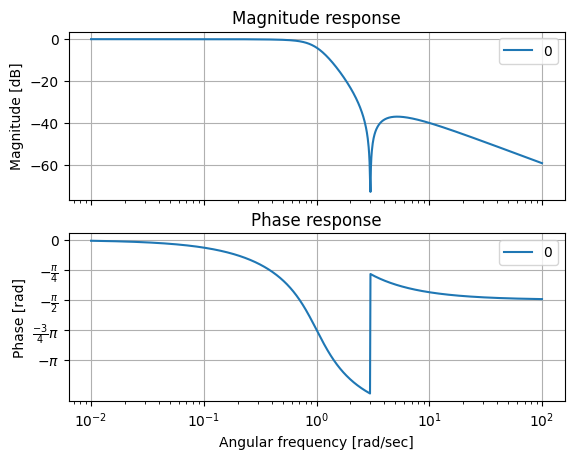

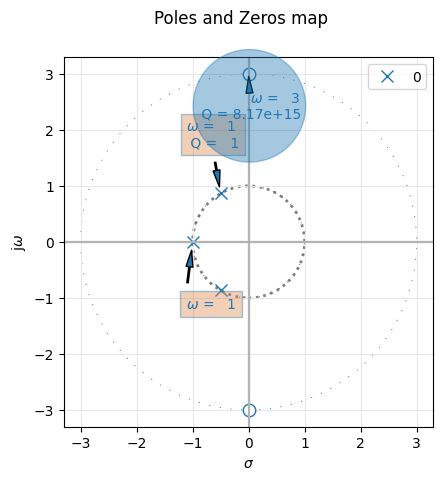

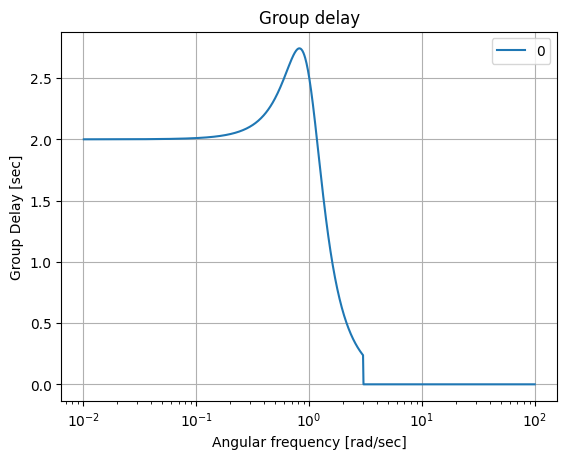

In [28]:
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
## setear en True para ver logs de dev
dev = False

wo = 300*2*np.pi
wo_n = 1
Q = 1
a = 1/9
c = 1
num_lp = np.array([a, 0, c])
den_lp = np.array([1, 2, 2, 1])
display(Markdown("""## Simulacion numerica de la respuesta pasabajos."""))
analyze_sys([signal.TransferFunction(num_lp, den_lp)])
##analyze_sys([signal.TransferFunction(np.array([0, 1]), np.array([1, 1]))])

## Obtencion de $T_{HP}(s)$

Para obtener la transferencia pasa altos, debemos aplicar el nucleo de transformacion $s = \frac{1}{s}$ a $T(s) =  \frac{1}{s+1} \frac{\frac{s^2}{9} + 1}{s^2 + s + 1}$

$T_{HP} = \frac{1}{\frac{1}{s}+1} \frac{\frac{1}{9 s^2} + 1}{\frac{1}{s^2} + \frac{1}{s} + 1} = \frac{1}{\frac{1}{s}+1} \frac{\frac{1}{9 s^2} + 1}{\frac{1}{s^2} + \frac{1}{s} + 1} =  \frac{s}{1+s} \frac{\frac{1}{9} + s^2}{1+ s + s^2} =  \frac{s}{s + 1} \frac{s^2 + \frac{1}{9}}{s^2 + s + 1}$


## Simulacion numerica de la respuesta Pasa altos.

Se observa que para $\omega_p = 1$ la curva pasa por $f_c$ y en $\omega_z = \frac{1}{3}$ esta el cero de transmision

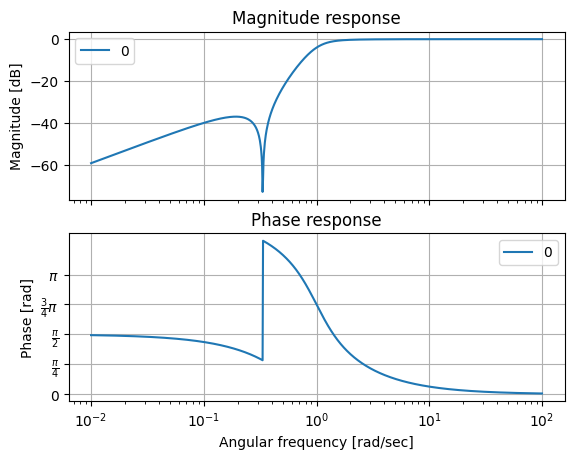

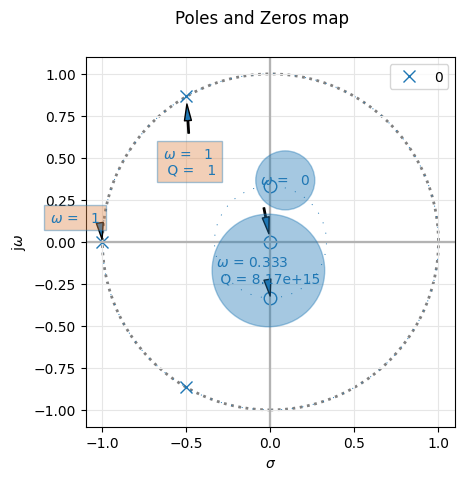

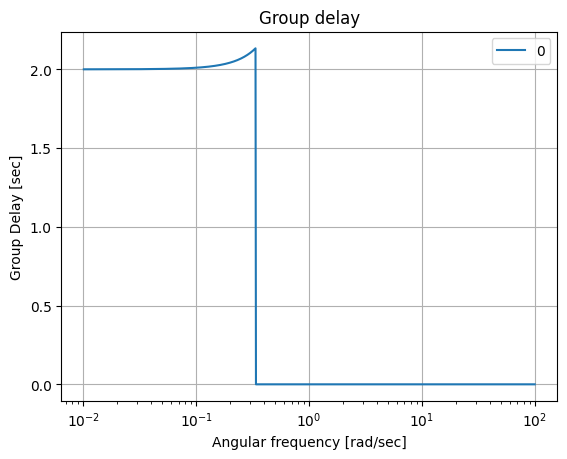

In [29]:
num_hp = np.array([c, 0, a, 0])
den_hp = np.array([1, 2, 2, 1])
display(Markdown("""## Simulacion numerica de la respuesta Pasa altos."""))
display(Markdown("""Se observa que para $\omega_p = 1$ la curva pasa por $f_c$ y en $\omega_z = \\frac{1}{3}$ esta el cero de transmision"""))
analyze_sys([signal.TransferFunction(num_hp, den_hp)])

Si graficamos ambas respuestas podemos ver como el punto de mapeo $omega_p = 1$ las curvas se cortan

<img src="./superpuestas.png" align="left"/> 


# Sintesis de la red

## Etapa de orden 1

Para esta etapa utilizamos una red RC con un capacitor en serie y un resistor en derivacion.

$T_1(s) = \frac{s}{s + \frac{1}{RC}}$

$\omega_o = \frac{1}{RC} = 1$

Adoptamos $C = 1 \implies R = 1$

## Etapa de orden 2

Red a utilizar

<img src="./red_order_2.png" align="left"/> 

Planteamos las ecuaciones de nodos:

Considreaciones:

$C_1 = C_2 = C$

$G_3 = G_4 = G$

$V_{x1} = V_{x2} = V_x$

N1: $V_x(G_1 + G_2 + sC) - V_1sC - V_aG_2 = 0$

N2: $V_x(G+G) - V_A G_ - V_o G = 0$

$2V_x = V_a + V_o$ (1)

N3: $V_x(sC + G_5) - V_1G_5 - V_osC + 0$

$V_x(sC + G_5) =  V_1G_5 + V_osC $

$V_x = \frac{V_1G_5 + V_osC}{sC + G_5}$ (2)

Reemplanzado (2) en (1)

$2 \frac{V_1G_5 + V_osC}{sC + G_5} = V_a + V_o$

$2V_1G_5 + 2V_osC = V_asC + V_aG_5 + V_osC + V_oG_5$

$2V_1G_5 + 2V_osC - V_osC - V_oG_5= V_a(sC + G_5) $

$2V_1G_5 + V_o(sC - G_5)= V_a(sC + G_5) $

$V_a = 2V_1 \frac{G_5}{(sC + G_5) } + V_o \frac{(sC - G_5)}{(sC + G_5)}$ (3)

Reemplazando (3) y (2) en N1

$\frac{V_1G_5 + V_osC}{sC + G_5} (G_1 + G_2 + sC) - V_1sC - 2V_1 \frac{G_5G_2}{(sC + G_5) } - V_o \frac{(sC - G_5)}{(sC + G_5)}G_2 = 0$


$\frac{V_1G_5 + V_osC}{sC + G_5} (G_1 + G_2 + sC) =  V_1sC + 2V_1 \frac{G_5}{(sC + G_5) } + V_o \frac{(sC - G_5)}{(sC + G_5)}G_2$

$\left(V_1G_5 + V_osC \right) (G_1 + G_2 + sC) =  V_1sC\left(sC + G_5\right) + 2V_1 G_5G_2 + V_o (sC - G_5)G_2$

$V_o\left(sCG_1 + scG_2 + s^2C^2- sCG_2 + G_5G_2\right) = V_1\left(s^2C^2 + sCG_5 + 2G_5G_2 - G_5G_1 - G_5G_2 - sCG_5\right)$

$V_o\left(s^2C^2 + sCG_1 + G_5G_2\right) = V_1\left(s^2C^2  + G_5(G_2 - G_1) \right)$

$\frac{V_o}{V_1} = \frac{\left(s^2C^2 + sCG_1 + G_5G_2\right)}{\left(s^2C^2  + G_5(G_2 - G_1) \right)}$

$T_2(s) = \frac{\left(s^2+ \frac{G_5G_2}{C^2}(1 - \frac{G_1}{G_2}) \right)}{\left(s^2 + s \frac{G_1}{C} + \frac{G_5G_2}{C^2}\right)}$

$\omega_o^2 = \frac{G_5G_2}{C^2} = 1$

Adoptamos $C=1 \implies G_5\times G_2 = 1$

Si $G_5 = G = 1 \implies G_2 = 1$ y nos queda

$T_2(s) = \frac{\left(s^2+ (1 - G_1) \right)}{\left(s^2 + s + 1\right)}$

$\frac{\omega_o}{Q} = \frac{G1}{C}$

Como se puede observar de las ecuaciones de diseño del filtro se hace presente dos limitaciones:

1) El valor de $G_1$ tiene que ser menor a la unidad o nos quedara un cero en el semiplano derecho, por eso esta red solo es apta para implementaciones pasa altos, mientras que la red propuesta por Schaumann sirve para implementar cualquier transferencia Bicuadratica.

2) $G_1$ tiene impacto directo en el la ubicacion del cero de transmision como en el factor Q. En este caso si se quiere cumplir con la ubicacion del cero de transmision $1- G_1 = \frac{1}{9} \implies G_1 = 0.888 = \frac{1}{R_1} \implies R_1 = 1.125$
    
    $\frac{\omega_o}{Q} = \frac{G1}{C} = \frac{1}{R_1C}$
    
    Como $\omega_o = 1 \land C =1 \implies R_1 = Q = 1.125$ y esto no cumple con el Q requerido para maxima planicida.

## Simulacion circuital.

<img src="./spice.png" align="left"/> 

<img src="./spice_plot.png" align="left"/> 
